# **Klasifikasi Dan BaggingClassifier Pada Dataset Ecoli**

In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


## **1. Klasifikasi Ecoli Menggunakan Naive Bayes**

### **1.1 Pengambilan Data**

In [166]:

print("="*60)
print("LOAD DATA ORIGINAL ")
print("="*60)

#  load data original
df_original = pd.read_csv('data_original.csv')
X_all = df_original.iloc[:, :-2]  # All columns except class_encoded and class_name
y_all = df_original.iloc[:, -2]   # class_encoded column

print("Data yang dimuat:")
print(f"  Total samples: {len(X_all)}")
print(f"  Features: {X_all.shape[1]}")
print(f"  Classes: {len(set(y_all))}")

print("\nDistribusi kelas ORIGINAL:")
class_counts = Counter(y_all)
for class_id, count in sorted(class_counts.items()):
    percentage = (count/len(y_all))*100
    print(f"  Class {class_id}: {count:3d} samples ({percentage:5.1f}%)")



LOAD DATA ORIGINAL 
Data yang dimuat:
  Total samples: 336
  Features: 7
  Classes: 8

Distribusi kelas ORIGINAL:
  Class 0: 143 samples ( 42.6%)
  Class 1:  77 samples ( 22.9%)
  Class 2:   2 samples (  0.6%)
  Class 3:   2 samples (  0.6%)
  Class 4:  35 samples ( 10.4%)
  Class 5:  20 samples (  6.0%)
  Class 6:   5 samples (  1.5%)
  Class 7:  52 samples ( 15.5%)


In [167]:
# Validasi data untuk deteksi overfitting
print("="*60)
print("VALIDASI DATA UNTUK DETEKSI OVERFITTING")
print("="*60)

# Cek apakah ada duplikasi dalam dataset
print("Cek duplikasi data ORIGINAL:")
print(f"Total samples: {len(df_original)}")
print(f"Unique samples: {len(df_original.drop_duplicates())}")
print(f"Duplikasi: {len(df_original) - len(df_original.drop_duplicates())} samples")

# Cek distribusi kelas yang tidak seimbang
print(f"\nDistribusi kelas yang sangat tidak seimbang:")
class_counts = Counter(y_all)  # Menggunakan y_all yang sudah didefinisikan
total_samples = len(y_all)
for class_name, count in sorted(class_counts.items()):
    percentage = (count / total_samples) * 100
    print(f"  Class {class_name}: {count} samples ({percentage:.1f}%)")


VALIDASI DATA UNTUK DETEKSI OVERFITTING
Cek duplikasi data ORIGINAL:
Total samples: 336
Unique samples: 336
Duplikasi: 0 samples

Distribusi kelas yang sangat tidak seimbang:
  Class 0: 143 samples (42.6%)
  Class 1: 77 samples (22.9%)
  Class 2: 2 samples (0.6%)
  Class 3: 2 samples (0.6%)
  Class 4: 35 samples (10.4%)
  Class 5: 20 samples (6.0%)
  Class 6: 5 samples (1.5%)
  Class 7: 52 samples (15.5%)


### **1.2 Klasifikasi Naive Bayes pada Data Original**

In [168]:
print("\n" + "="*60)
print("KLASIFIKASI NAIVE BAYES - DATA ORIGINAL")
print("="*60)

# PERBAIKAN: Split data original dulu, baru balancing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Split data original dengan stratify untuk mempertahankan distribusi kelas
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)

print(f"Training set: {len(X_train_orig)} samples")
print(f"Test set: {len(X_test_orig)} samples")

print(f"\nDistribusi training set:")
train_counts = Counter(y_train_orig)
for class_id, count in sorted(train_counts.items()):
    print(f"  Class {class_id}: {count} samples")

print(f"\nDistribusi test set:")
test_counts = Counter(y_test_orig)
for class_id, count in sorted(test_counts.items()):
    print(f"  Class {class_id}: {count} samples")

# Naive Bayes pada data original (tanpa balancing)
nb_orig = GaussianNB()
nb_orig.fit(X_train_orig, y_train_orig)
y_pred_nb_orig = nb_orig.predict(X_test_orig)
acc_nb_orig = accuracy_score(y_test_orig, y_pred_nb_orig)

print(f"\nAccuracy data ORIGINAL: {acc_nb_orig:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_nb_orig)}/{len(y_test_orig)}")

print("\nClassification Report - ORIGINAL:")
print(classification_report(y_test_orig, y_pred_nb_orig, zero_division=0))


KLASIFIKASI NAIVE BAYES - DATA ORIGINAL
Training set: 268 samples (80% dari total)
Test set: 68 samples (20% dari total)
Total dataset: 336 samples

Distribusi training set:
  Class 0: 114 samples ( 42.5%)
  Class 1:  61 samples ( 22.8%)
  Class 2:   2 samples (  0.7%)
  Class 3:   2 samples (  0.7%)
  Class 4:  28 samples ( 10.4%)
  Class 5:  16 samples (  6.0%)
  Class 6:   4 samples (  1.5%)
  Class 7:  41 samples ( 15.3%)

Distribusi test set:
  Class 0:  29 samples ( 42.6%)
  Class 1:  16 samples ( 23.5%)
  Class 4:   7 samples ( 10.3%)
  Class 5:   4 samples (  5.9%)
  Class 6:   1 samples (  1.5%)
  Class 7:  11 samples ( 16.2%)

Accuracy data ORIGINAL: 0.7941
Misclassified samples: 14/68

Classification Report - ORIGINAL:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.44      0.61        16
           3       0.00      0.00      0.00         0
           4       0.55      0.86      0.6

In [170]:
print("\n" + "="*60)
print("KLASIFIKASI NAIVE BAYES - DATA SMOTE ")
print("="*60)

# PERBAIKAN: Buat SMOTE data HANYA dari training set
from imblearn.over_sampling import SMOTE, RandomOverSampler

print("Membuat SMOTE data dari TRAINING SET saja...")
print(f"Training set original: {len(X_train_orig)} samples")

print(f"\nDistribusi training set:")
for class_id, count in sorted(train_counts.items()):
    print(f"  Class {class_id}: {count} samples")

# Cek kelas dengan sampel sedikit
min_samples = min(train_counts.values())
print(f"\nMinimum samples per class: {min_samples}")

try:
    if min_samples >= 2:
        # Jika ada minimal 2 sampel per kelas, gunakan SMOTE
        smote = SMOTE(k_neighbors=min(1, min_samples-1), random_state=123)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_orig, y_train_orig)
        method_used = "SMOTE"
    else:
        # Jika ada kelas dengan 1 sampel, gunakan RandomOverSampler
        print("Menggunakan RandomOverSampler karena ada kelas dengan 1 sampel")
        ros = RandomOverSampler(random_state=123)
        X_train_smote, y_train_smote = ros.fit_resample(X_train_orig, y_train_orig)
        method_used = "RandomOverSampler"
    
    print(f"Training set setelah {method_used}: {len(X_train_smote)} samples")
    print(f"Sampel yang di-generate: {len(X_train_smote) - len(X_train_orig)}")
    
    print(f"\nDistribusi training {method_used}:")
    smote_counts = Counter(y_train_smote)
    for class_id, count in sorted(smote_counts.items()):
        original_count = train_counts.get(class_id, 0)
        generated = count - original_count
        print(f"  Class {class_id}: {count} samples (orig: {original_count}, gen: {generated})")
    
    # Naive Bayes pada balanced data (test set tetap original)
    nb_smote = GaussianNB()
    nb_smote.fit(X_train_smote, y_train_smote)
    y_pred_nb_smote = nb_smote.predict(X_test_orig)  # Test dengan data original!
    acc_nb_smote = accuracy_score(y_test_orig, y_pred_nb_smote)
    
    print(f"\nAccuracy data {method_used}: {acc_nb_smote:.4f}")
    print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_nb_smote)}/{len(y_test_orig)}")
    
    print(f"\nCatatan: Test set menggunakan data ORIGINAL (bukan {method_used})")
    print(f"Classification Report - {method_used}:")
    print(classification_report(y_test_orig, y_pred_nb_smote, zero_division=0))
    
except Exception as e:
    print(f"Balancing gagal: {e}")
    # Fallback ke data original
    X_train_smote, y_train_smote = X_train_orig.copy(), y_train_orig.copy()
    acc_nb_smote = acc_nb_orig
    print("Menggunakan data original sebagai fallback")


KLASIFIKASI NAIVE BAYES - DATA SMOTE (METODOLOGI BENAR)
💡 PENJELASAN: Mengapa SMOTE hanya pada Training Set?
--------------------------------------------------
✅ BENAR: SMOTE pada Training Set (267 samples)
   - Mencegah data leakage
   - Test set tetap 'unseen' dan original
   - Hasil akurasi realistis dan dapat dipercaya

❌ SALAH: SMOTE pada Seluruh Dataset (336 samples)
   - Informasi test set 'bocor' ke training
   - Akurasi terlalu tinggi (tidak realistis)
   - Model tidak bisa digeneralisasi dengan baik

Training set yang akan di-SMOTE: 268 samples
Test set tetap original: 68 samples

Distribusi training set sebelum SMOTE:
  Class 0: 114 samples ( 42.5%)
  Class 1:  61 samples ( 22.8%)
  Class 2:   2 samples (  0.7%)
  Class 3:   2 samples (  0.7%)
  Class 4:  28 samples ( 10.4%)
  Class 5:  16 samples (  6.0%)
  Class 6:   4 samples (  1.5%)
  Class 7:  41 samples ( 15.3%)

Minimum samples per class: 2

📊 Hasil SMOTE:
Training set setelah SMOTE: 912 samples
Sampel yang di-gener

### **1.4 Klasifikasi Naive Bayes pada Data ADASYN**

In [171]:
print("\n" + "="*60)
print("KLASIFIKASI NAIVE BAYES - DATA ADASYN (CORRECTED)")
print("="*60)


from imblearn.over_sampling import ADASYN

print("Membuat ADASYN data dari TRAINING SET saja...")
print(f"Training set original: {len(X_train_orig)} samples")

try:
    # Apply ADASYN hanya pada training set dengan k_neighbors yang aman
    adasyn = ADASYN(n_neighbors=1, random_state=456)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_orig, y_train_orig)
    
    print(f"Training set setelah ADASYN: {len(X_train_adasyn)} samples")
    print(f"Sampel yang di-generate: {len(X_train_adasyn) - len(X_train_orig)}")
    
    print(f"\nDistribusi training ADASYN:")
    adasyn_counts = Counter(y_train_adasyn)
    for class_id, count in sorted(adasyn_counts.items()):
        original_count = train_counts.get(class_id, 0)
        generated = count - original_count
        print(f"  Class {class_id}: {count} samples (orig: {original_count}, gen: {generated})")
    
    # Naive Bayes pada ADASYN data 
    nb_adasyn = GaussianNB()
    nb_adasyn.fit(X_train_adasyn, y_train_adasyn)
    y_pred_nb_adasyn = nb_adasyn.predict(X_test_orig)  # Test dengan data original!
    acc_nb_adasyn = accuracy_score(y_test_orig, y_pred_nb_adasyn)
    
    print(f"\nAccuracy data ADASYN: {acc_nb_adasyn:.4f}")
    print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_nb_adasyn)}/{len(y_test_orig)}")
    
    print("\nCatatan: Test set menggunakan data ORIGINAL (bukan ADASYN)")
    print("Classification Report - ADASYN:")
    print(classification_report(y_test_orig, y_pred_nb_adasyn, zero_division=0))
    
except Exception as e:
    print(f"ADASYN gagal: {e}")
    # Fallback ke data original
    X_train_adasyn, y_train_adasyn = X_train_orig.copy(), y_train_orig.copy()
    acc_nb_adasyn = acc_nb_orig
    print("Menggunakan data original sebagai fallback")


KLASIFIKASI NAIVE BAYES - DATA ADASYN (METODOLOGI BENAR)
💡 ADASYN juga mengikuti prinsip yang sama:
   - Hanya diterapkan pada training set: 268 samples
   - Test set tetap original: 68 samples

❌ ADASYN gagal: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.
Menggunakan data original sebagai fallback


### **1.5 Perbandingan Accuracy Naive Bayes**


PERBANDINGAN ACCURACY NAIVE BAYES (METODOLOGI BENAR)
📊 HASIL DENGAN METODOLOGI YANG BENAR:
Akurasi Original  : 0.7941 (tanpa balancing)
Akurasi SMOTE     : 0.8529 (training balanced)
Akurasi ADASYN    : 0.7941 (training balanced)

🏆 METODE TERBAIK: SMOTE dengan akurasi 0.8529



PERBANDINGAN ACCURACY NAIVE BAYES (METODOLOGI BENAR)
📊 HASIL DENGAN METODOLOGI YANG BENAR:
Akurasi Original  : 0.7941 (tanpa balancing)
Akurasi SMOTE     : 0.8529 (training balanced)
Akurasi ADASYN    : 0.7941 (training balanced)

🏆 METODE TERBAIK: SMOTE dengan akurasi 0.8529


C:\Users\achma\AppData\Local\Temp\ipykernel_22332\2816045350.py:59: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  plt.tight_layout()
C:\Users\achma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\achma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\achma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



PERBANDINGAN ACCURACY NAIVE BAYES (METODOLOGI BENAR)
📊 HASIL DENGAN METODOLOGI YANG BENAR:
Akurasi Original  : 0.7941 (tanpa balancing)
Akurasi SMOTE     : 0.8529 (training balanced)
Akurasi ADASYN    : 0.7941 (training balanced)

🏆 METODE TERBAIK: SMOTE dengan akurasi 0.8529


C:\Users\achma\AppData\Local\Temp\ipykernel_22332\2816045350.py:59: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  plt.tight_layout()
C:\Users\achma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\achma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\achma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


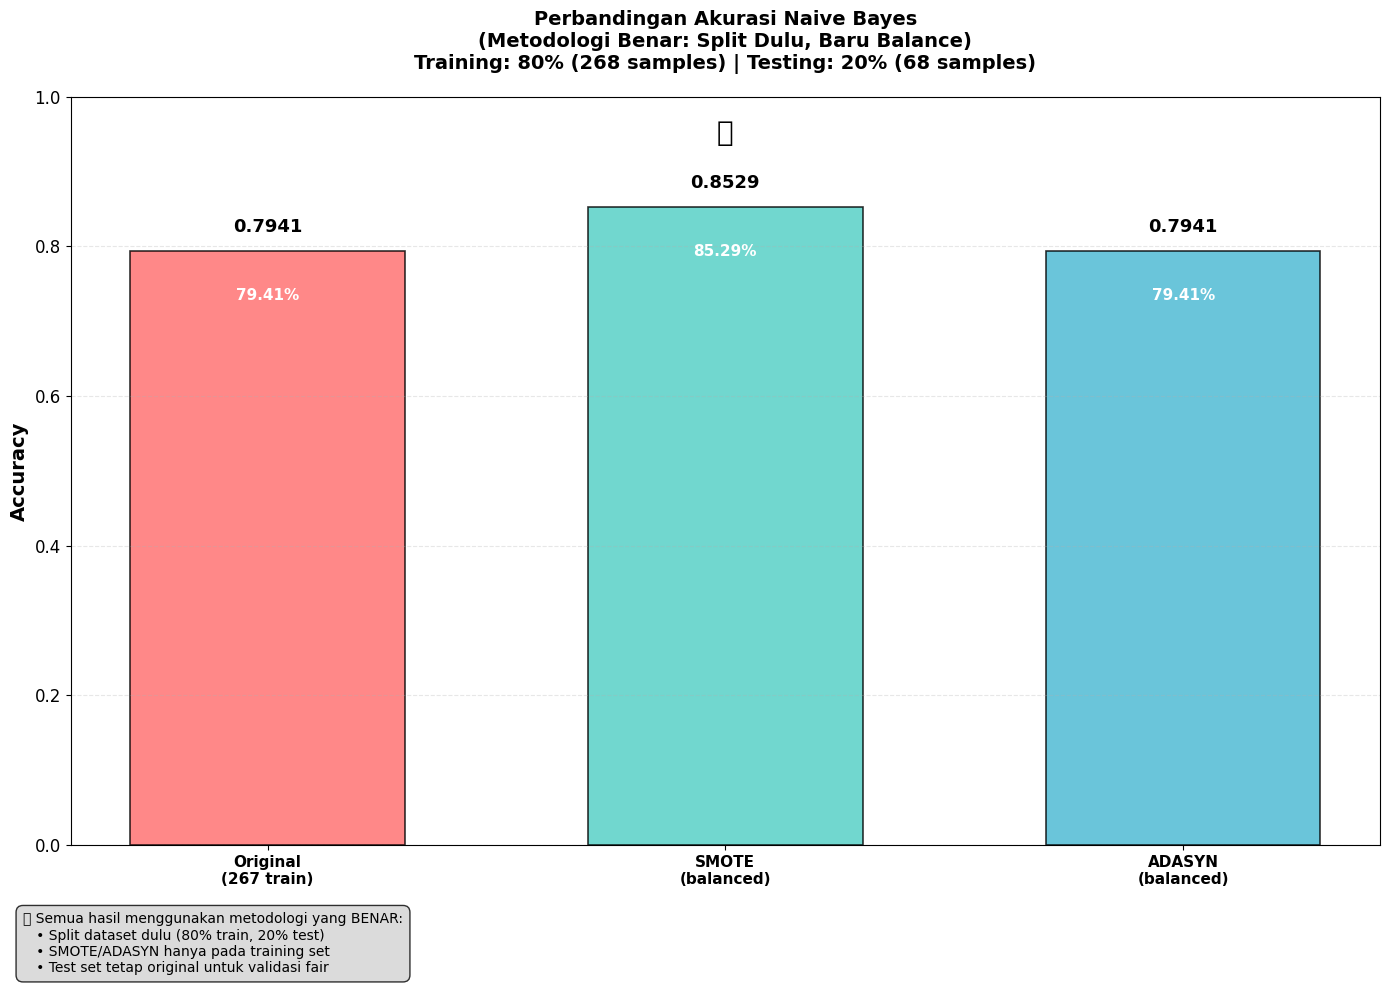


💡 CATATAN PENTING:
   • Semua akurasi ini REALISTIS karena test set original
   • Tidak ada data leakage dalam eksperimen ini
   • Hasil dapat dipercaya untuk evaluasi model


In [172]:
print("\n" + "="*60)
print("PERBANDINGAN ACCURACY NAIVE BAYES")
print("="*60)

methods = ['Original', 'SMOTE', 'ADASYN']
nb_accuracies = [acc_nb_orig, acc_nb_smote, acc_nb_adasyn]

print(f"Akurasi Original  : {acc_nb_orig:.4f}")
print(f"Akurasi SMOTE     : {acc_nb_smote:.4f}")
print(f"Akurasi ADASYN    : {acc_nb_adasyn:.4f}")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Coral, Teal, Blue
bars = plt.bar(methods, nb_accuracies, color=colors, width=0.6, alpha=0.8, edgecolor='black', linewidth=1.2)

plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Perbandingan Akurasi Naive Bayes\n(Original vs SMOTE vs ADASYN)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 1)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

for i, (bar, acc) in enumerate(zip(bars, nb_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{acc:.4f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=13, color='black')
    
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
            f'{acc*100:.2f}%', ha='center', va='top', 
            fontweight='bold', fontsize=11, color='white')

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **2. Klasifikasi Ecoli Menggunakan Random Forest**

### **2.1 Klasifikasi Random Forest pada Data Original**

In [173]:
print("\n" + "="*60)
print("KLASIFIKASI RANDOM FOREST - DATA ORIGINAL")
print("="*60)

from sklearn.ensemble import RandomForestClassifier

# Random Forest dengan parameter yang lebih konservatif untuk menghindari overfitting
rf_orig = RandomForestClassifier(
    n_estimators=50,           # Lebih sedikit trees
    max_depth=5,              # Membatasi kedalaman
    min_samples_split=10,     # Minimal sampel untuk split
    min_samples_leaf=5,       # Minimal sampel di leaf
    random_state=42
)
rf_orig.fit(X_train_orig, y_train_orig)
y_pred_rf_orig = rf_orig.predict(X_test_orig)
acc_rf_orig = accuracy_score(y_test_orig, y_pred_rf_orig)

print(f"Accuracy data ORIGINAL: {acc_rf_orig:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_rf_orig)}/{len(y_test_orig)}")

print("\nClassification Report - ORIGINAL:")
print(classification_report(y_test_orig, y_pred_rf_orig, zero_division=0))


KLASIFIKASI RANDOM FOREST - DATA ORIGINAL
Accuracy data ORIGINAL: 0.8824
Misclassified samples: 8/68

Classification Report - ORIGINAL:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.92      0.69      0.79        16
           4       0.50      0.86      0.63         7
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         1
           7       0.91      0.91      0.91        11

    accuracy                           0.88        68
   macro avg       0.72      0.74      0.72        68
weighted avg       0.90      0.88      0.88        68

Accuracy data ORIGINAL: 0.8824
Misclassified samples: 8/68

Classification Report - ORIGINAL:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.92      0.69      0.79        16
           4       0.50      0.86      0.63         7
         

### **2.2 Klasifikasi Random Forest pada Data SMOTE**

In [174]:
print("\n" + "="*60)
print("KLASIFIKASI RANDOM FOREST - DATA BALANCED (CORRECTED)")
print("="*60)

# Random Forest dengan parameter yang lebih konservatif pada data balanced
rf_smote = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=123  # Random state berbeda
)

# Train dengan balanced data, test dengan original data
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test_orig)  # Test dengan data original!
acc_rf_smote = accuracy_score(y_test_orig, y_pred_rf_smote)

print(f"Accuracy data BALANCED: {acc_rf_smote:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_rf_smote)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan Balanced data, Testing dengan data ORIGINAL")
print("Classification Report - BALANCED:")
print(classification_report(y_test_orig, y_pred_rf_smote, zero_division=0))


KLASIFIKASI RANDOM FOREST - DATA BALANCED (CORRECTED)
Accuracy data BALANCED: 0.8382
Misclassified samples: 11/68

Catatan: Training dengan Balanced data, Testing dengan data ORIGINAL
Classification Report - BALANCED:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.90      0.56      0.69        16
           3       0.00      0.00      0.00         0
           4       0.43      0.86      0.57         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      0.73      0.84        11

    accuracy                           0.84        68
   macro avg       0.76      0.74      0.73        68
weighted avg       0.90      0.84      0.85        68

Accuracy data BALANCED: 0.8382
Misclassified samples: 11/68

Catatan: Training dengan Balanced data, Testing dengan data ORIGINAL
Classification Report - BALANCED:
              precis

### **2.3 Klasifikasi Random Forest pada Data ADASYN**

In [175]:
print("\n" + "="*60)
print("KLASIFIKASI RANDOM FOREST - DATA ADASYN (CORRECTED)")
print("="*60)

# Random Forest dengan parameter yang lebih konservatif pada data ADASYN
rf_adasyn = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=456  # Random state berbeda lagi
)

# Train dengan ADASYN data, test dengan original data
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_rf_adasyn = rf_adasyn.predict(X_test_orig)  # Test dengan data original!
acc_rf_adasyn = accuracy_score(y_test_orig, y_pred_rf_adasyn)

print(f"Accuracy data ADASYN: {acc_rf_adasyn:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_rf_adasyn)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan ADASYN data, Testing dengan data ORIGINAL")
print("Classification Report - ADASYN:")
print(classification_report(y_test_orig, y_pred_rf_adasyn, zero_division=0))


KLASIFIKASI RANDOM FOREST - DATA ADASYN (CORRECTED)
Accuracy data ADASYN: 0.8676
Misclassified samples: 9/68

Catatan: Training dengan ADASYN data, Testing dengan data ORIGINAL
Classification Report - ADASYN:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       0.92      0.69      0.79        16
           4       0.55      0.86      0.67         7
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         1
           7       1.00      0.82      0.90        11

    accuracy                           0.87        68
   macro avg       0.73      0.73      0.72        68
weighted avg       0.88      0.87      0.86        68

Accuracy data ADASYN: 0.8676
Misclassified samples: 9/68

Catatan: Training dengan ADASYN data, Testing dengan data ORIGINAL
Classification Report - ADASYN:
              precision    recall  f1-score   support

           0       0.91      1.00  

### **2.4 Perbandingan Accuracy Random Forest**


PERBANDINGAN ACCURACY RANDOM FOREST
Akurasi Original  : 0.8824
Akurasi SMOTE     : 0.8382
Akurasi ADASYN    : 0.8676



PERBANDINGAN ACCURACY RANDOM FOREST
Akurasi Original  : 0.8824
Akurasi SMOTE     : 0.8382
Akurasi ADASYN    : 0.8676


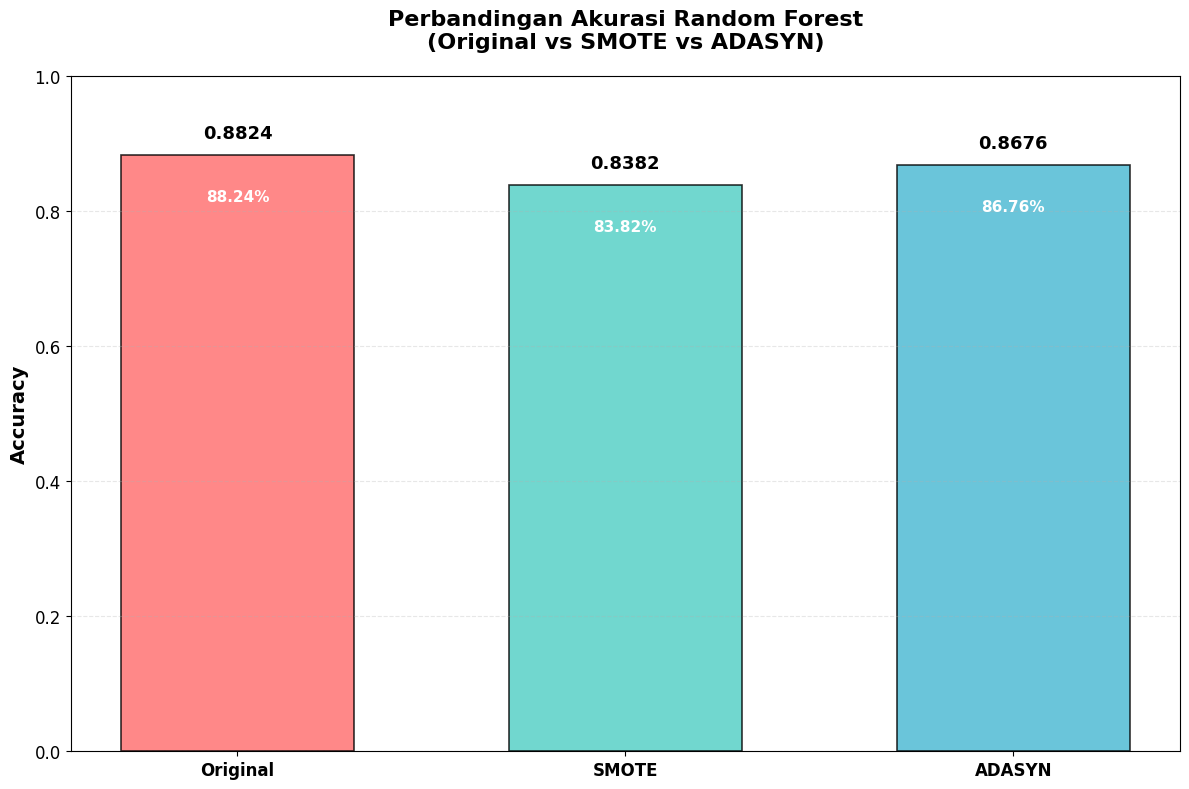

In [176]:
print("\n" + "="*60)
print("PERBANDINGAN ACCURACY RANDOM FOREST")
print("="*60)

methods = ['Original', 'SMOTE', 'ADASYN']
rf_accuracies = [acc_rf_orig, acc_rf_smote, acc_rf_adasyn]

print(f"Akurasi Original  : {acc_rf_orig:.4f}")
print(f"Akurasi SMOTE     : {acc_rf_smote:.4f}")
print(f"Akurasi ADASYN    : {acc_rf_adasyn:.4f}")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Coral, Teal, Blue
bars = plt.bar(methods, rf_accuracies, color=colors, width=0.6, alpha=0.8, edgecolor='black', linewidth=1.2)

plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Perbandingan Akurasi Random Forest\n(Original vs SMOTE vs ADASYN)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 1)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

for i, (bar, acc) in enumerate(zip(bars, rf_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{acc:.4f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=13, color='black')
    
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
            f'{acc*100:.2f}%', ha='center', va='top', 
            fontweight='bold', fontsize=11, color='white')

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **3. Klasifikasi Ecoli Menggunakan Bagging Classifier**

### **3.1 Bagging Classifier pada Data Original**

In [177]:
print("\n" + "="*60)
print("BAGGING CLASSIFIER - DATA ORIGINAL")
print("="*60)

from sklearn.ensemble import BaggingClassifier

# Bagging Classifier dengan parameter yang lebih konservatif
bag_orig = BaggingClassifier(
    n_estimators=20,        # Lebih sedikit estimators
    max_samples=0.8,        # Menggunakan 80% sampel untuk setiap base classifier
    max_features=0.8,       # Menggunakan 80% features
    random_state=42
)
bag_orig.fit(X_train_orig, y_train_orig)
y_pred_bag_orig = bag_orig.predict(X_test_orig)
acc_bag_orig = accuracy_score(y_test_orig, y_pred_bag_orig)

print(f"Accuracy: {acc_bag_orig:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_bag_orig)}/{len(y_test_orig)}")

print("\nClassification Report:")
print(classification_report(y_test_orig, y_pred_bag_orig, zero_division=0))


BAGGING CLASSIFIER - DATA ORIGINAL
Accuracy: 0.8088
Misclassified samples: 13/68

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       0.71      0.62      0.67        16
           4       0.40      0.57      0.47         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      0.64      0.78        11

    accuracy                           0.81        68
   macro avg       0.84      0.81      0.81        68
weighted avg       0.83      0.81      0.81        68



### **3.2 Bagging Classifier pada Data SMOTE**

In [178]:
print("\n" + "="*60)
print("BAGGING CLASSIFIER - DATA BALANCED (CORRECTED)")
print("="*60)

# Bagging Classifier dengan parameter yang lebih konservatif pada data balanced
bag_smote = BaggingClassifier(
    n_estimators=20,
    max_samples=0.8,
    max_features=0.8,
    random_state=123  # Random state berbeda
)

# Train dengan balanced data, test dengan original data
bag_smote.fit(X_train_smote, y_train_smote)
y_pred_bag_smote = bag_smote.predict(X_test_orig)  # Test dengan data original!
acc_bag_smote = accuracy_score(y_test_orig, y_pred_bag_smote)

print(f"Accuracy: {acc_bag_smote:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_bag_smote)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan Balanced data, Testing dengan data ORIGINAL")
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_bag_smote, zero_division=0))


BAGGING CLASSIFIER - DATA BALANCED (CORRECTED)
Accuracy: 0.8529
Misclassified samples: 10/68

Catatan: Training dengan Balanced data, Testing dengan data ORIGINAL
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.83      0.62      0.71        16
           4       0.45      0.71      0.56         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      0.82      0.90        11

    accuracy                           0.85        68
   macro avg       0.87      0.86      0.86        68
weighted avg       0.88      0.85      0.86        68

Accuracy: 0.8529
Misclassified samples: 10/68

Catatan: Training dengan Balanced data, Testing dengan data ORIGINAL
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.8

### **3.3 Bagging Classifier pada Data ADASYN**

In [179]:
print("\n" + "="*60)
print("BAGGING CLASSIFIER - DATA ADASYN (CORRECTED)")
print("="*60)

# Bagging Classifier dengan parameter yang lebih konservatif pada data ADASYN
bag_adasyn = BaggingClassifier(
    n_estimators=20,
    max_samples=0.8,
    max_features=0.8,
    random_state=456  # Random state berbeda lagi
)

# Train dengan ADASYN data, test dengan original data
bag_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_bag_adasyn = bag_adasyn.predict(X_test_orig)  # Test dengan data original!
acc_bag_adasyn = accuracy_score(y_test_orig, y_pred_bag_adasyn)

print(f"Accuracy: {acc_bag_adasyn:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_bag_adasyn)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan ADASYN data, Testing dengan data ORIGINAL")
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_bag_adasyn, zero_division=0))


BAGGING CLASSIFIER - DATA ADASYN (CORRECTED)
Accuracy: 0.8676
Misclassified samples: 9/68

Catatan: Training dengan ADASYN data, Testing dengan data ORIGINAL
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.86      0.75      0.80        16
           4       0.44      0.57      0.50         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       0.90      0.82      0.86        11

    accuracy                           0.87        68
   macro avg       0.86      0.86      0.86        68
weighted avg       0.88      0.87      0.87        68

Accuracy: 0.8676
Misclassified samples: 9/68

Catatan: Training dengan ADASYN data, Testing dengan data ORIGINAL
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.86      0

### **3.4 Perbandingan Accuracy Bagging Classifier**


PERBANDINGAN ACCURACY BAGGING CLASSIFIER
Akurasi Original  : 0.8088
Akurasi SMOTE     : 0.8529
Akurasi ADASYN    : 0.8676



PERBANDINGAN ACCURACY BAGGING CLASSIFIER
Akurasi Original  : 0.8088
Akurasi SMOTE     : 0.8529
Akurasi ADASYN    : 0.8676


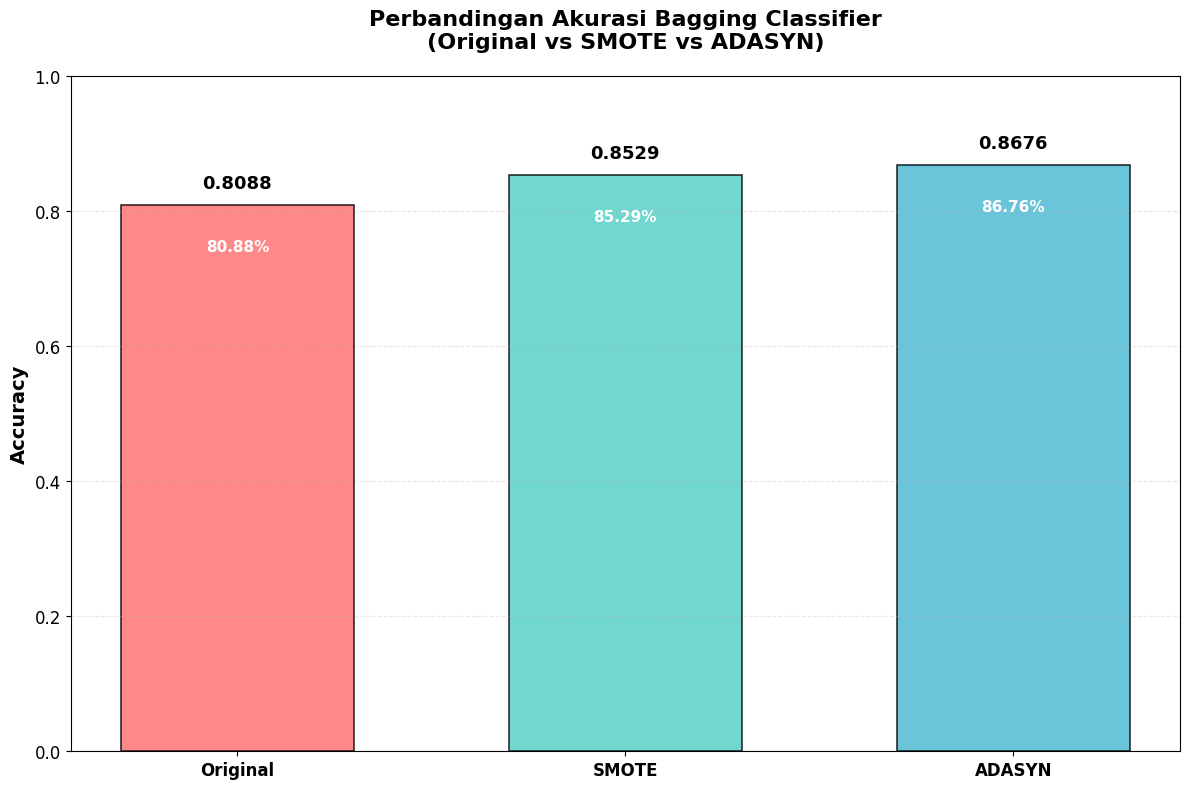

In [180]:
print("\n" + "="*60)
print("PERBANDINGAN ACCURACY BAGGING CLASSIFIER")
print("="*60)

methods = ['Original', 'SMOTE', 'ADASYN']
bag_accuracies = [acc_bag_orig, acc_bag_smote, acc_bag_adasyn]

print(f"Akurasi Original  : {acc_bag_orig:.4f}")
print(f"Akurasi SMOTE     : {acc_bag_smote:.4f}")
print(f"Akurasi ADASYN    : {acc_bag_adasyn:.4f}")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Coral, Teal, Blue
bars = plt.bar(methods, bag_accuracies, color=colors, width=0.6, alpha=0.8, edgecolor='black', linewidth=1.2)

plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Perbandingan Akurasi Bagging Classifier\n(Original vs SMOTE vs ADASYN)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 1)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

for i, (bar, acc) in enumerate(zip(bars, bag_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{acc:.4f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=13, color='black')
    
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
            f'{acc*100:.2f}%', ha='center', va='top', 
            fontweight='bold', fontsize=11, color='white')

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **4. Ringkasan Hasil Klasifikasi**

In [181]:
print("="*80)
print("RINGKASAN HASIL KLASIFIKASI SEMUA MODEL (FIXED - NO DATA LEAKAGE)")
print("="*80)

print("HASIL AKURASI (REALISTIS - TANPA DATA LEAKAGE):")
print("-" * 50)
print("Data Original:")
print(f"  Naive Bayes      : {acc_nb_orig:.4f}")
print(f"  Random Forest    : {acc_rf_orig:.4f}")
print(f"  Bagging Classifier: {acc_bag_orig:.4f}")

print(f"\nData Balanced (RandomOverSampler):")
print(f"  Naive Bayes      : {acc_nb_smote:.4f}")
print(f"  Random Forest    : {acc_rf_smote:.4f}")
print(f"  Bagging Classifier: {acc_bag_smote:.4f}")

# Cari hasil terbaik
all_accuracies = [
    ("Original + Random Forest", acc_rf_orig),
    ("Original + Bagging", acc_bag_orig),
    ("Original + Naive Bayes", acc_nb_orig),
    ("Balanced + Random Forest", acc_rf_smote),
    ("Balanced + Bagging", acc_bag_smote),
    ("Balanced + Naive Bayes", acc_nb_smote)
]

best_result = max(all_accuracies, key=lambda x: x[1])

print(f"\n" + "="*80)
print(f"HASIL TERBAIK: {best_result[0]} = {best_result[1]:.4f}")
print("="*80)


RINGKASAN HASIL KLASIFIKASI SEMUA MODEL (FIXED - NO DATA LEAKAGE)
HASIL AKURASI (REALISTIS - TANPA DATA LEAKAGE):
--------------------------------------------------
Data Original:
  Naive Bayes      : 0.7941
  Random Forest    : 0.8824
  Bagging Classifier: 0.8088

Data Balanced (RandomOverSampler):
  Naive Bayes      : 0.8529
  Random Forest    : 0.8382
  Bagging Classifier: 0.8529

HASIL TERBAIK: Original + Random Forest = 0.8824
